## Device simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, Boltzmann, e

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Plasma dispersion effect

The change in index of refraction is phenomenologically described by [Nedeljkovic]:
\begin{align}
\Delta n@1550~\textrm{nm} = -5.40\times 10^{-22} \left(\Delta N\right)^{1.011} - 1.53 \times 10^{-18} \left(\Delta P\right)^{0.838} \\
\Delta n@1310~\textrm{nm} = -2.98\times 10^{-22} \left(\Delta N\right)^{1.016} - 1.25 \times 10^{-18} \left(\Delta P\right)^{0.835}
\end{align}

In [3]:
def Dn_1550_nm(DN, DP):
  return -5.40e-22 * DN**1.011 - 1.53e-18 * DP**0.838

def Dn_1310_nm(DN, DP):
  return -2.98e-22 * DN**1.016 - 1.25e-18 * DP**0.835

In [4]:
DN = np.logspace(15,20,100)
DP = np.logspace(15,20,100)

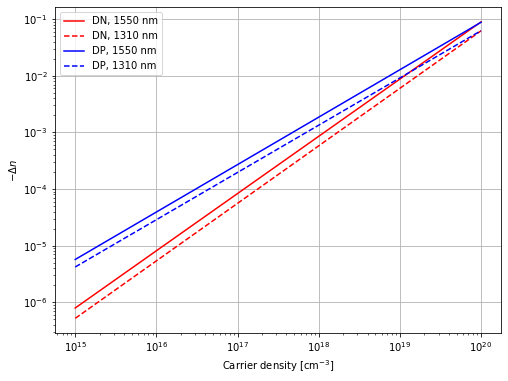

In [5]:
plt.figure(figsize=(8,6))
plt.plot(DN, -Dn_1550_nm(DN, 0), 'r-',  label = 'DN, 1550 nm')
plt.plot(DN, -Dn_1310_nm(DN, 0), 'r--', label = 'DN, 1310 nm')
plt.plot(DP, -Dn_1550_nm(0, DP), 'b-',  label = 'DP, 1550 nm')
plt.plot(DP, -Dn_1310_nm(0, DP), 'b--', label = 'DP, 1310 nm')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('Carrier density [cm$^{-3}$]')
plt.ylabel(r'$-\Delta n$')
plt.legend()

The change in absorption is described by
\begin{align}
\Delta \alpha@1550~\textrm{nm} = 8.88 \times 10^{-21} \left(\Delta N\right)^{1.167} + 5.84 \times 10^{-20} \left(\Delta P\right) ^ {1.109} \\
\Delta \alpha@1310~\textrm{nm} = 3.48 \times 10^{-22} \left(\Delta N\right)^{1.229} + 1.02 \times 10^{-19} \left(\Delta P \right)^ {1.089}
\end{align}

In [6]:
def Dalpha_1550_nm(DN, DP):
  return 8.88e-21 * DN**1.167 + 5.84e-20 * DP**1.109

def Dalpha_1310_nm(DN, DP):
  return 3.48e-22 * DN**1.229 + 1.02e-19 * DP**1.089

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


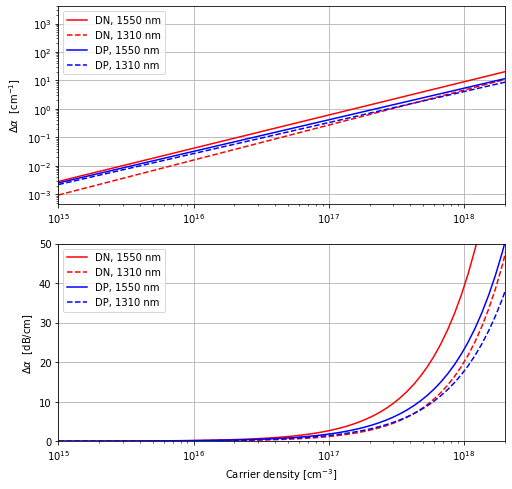

In [7]:
fig,axs = plt.subplots(2, figsize=(8,8))
axs[0].plot(DN, Dalpha_1550_nm(DN, 0), 'r-',  label = 'DN, 1550 nm')
axs[0].plot(DN, Dalpha_1310_nm(DN, 0), 'r--', label = 'DN, 1310 nm')
axs[0].plot(DP, Dalpha_1550_nm(0, DP), 'b-',  label = 'DP, 1550 nm')
axs[0].plot(DP, Dalpha_1310_nm(0, DP), 'b--', label = 'DP, 1310 nm')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim([1e15,2e18])
axs[0].grid()
axs[0].set_ylabel(r'$\Delta \alpha$  [cm$^{-1}$]')
axs[0].legend()

axs[1].plot(DN, 10*np.log10(np.exp(Dalpha_1550_nm(DN, 0))), 'r-',  label = 'DN, 1550 nm')
axs[1].plot(DN, 10*np.log10(np.exp(Dalpha_1310_nm(DN, 0))), 'r--', label = 'DN, 1310 nm')
axs[1].plot(DP, 10*np.log10(np.exp(Dalpha_1550_nm(0, DP))), 'b-',  label = 'DP, 1550 nm')
axs[1].plot(DP, 10*np.log10(np.exp(Dalpha_1310_nm(0, DP))), 'b--', label = 'DP, 1310 nm')
axs[1].set_xscale('log')
axs[1].set_xlim([1e15,2e18])
axs[1].set_ylim([0,50])
axs[1].grid()
axs[1].set_xlabel('Carrier density [cm$^{-3}$]')
axs[1].set_ylabel(r'$\Delta \alpha$  [dB/cm]')
axs[1].legend()

Taking into account the wavelength dependence:

In [8]:
def Dn_lambda(DN, DP, lmbd):
  return -3.64e-10 * lmbd**2 * DN - 3.51e-6 * lmbd**2 * DP**0.8
def Dalpha_lambda(DN, DP, lmbd):
  return  3.52e-6  * lmbd**2 * DN + 2.4e-6  * lmbd**2 * DP

In [9]:
lmbd = np.linspace(1500e-9,1600e-9,10)

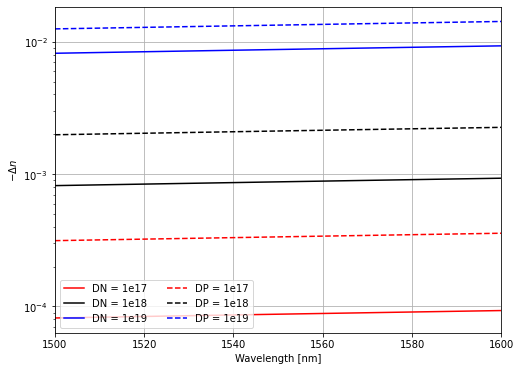

In [10]:
plt.figure(figsize=(8,6))
plt.plot(1e9*lmbd, -Dn_lambda(1e17, 0, lmbd), 'r', label = 'DN = 1e17')
plt.plot(1e9*lmbd, -Dn_lambda(1e18, 0, lmbd), 'k', label = 'DN = 1e18')
plt.plot(1e9*lmbd, -Dn_lambda(1e19, 0, lmbd), 'b', label = 'DN = 1e19')
plt.plot(1e9*lmbd, -Dn_lambda(0, 1e17, lmbd), 'r--', label = 'DP = 1e17')
plt.plot(1e9*lmbd, -Dn_lambda(0, 1e18, lmbd), 'k--', label = 'DP = 1e18')
plt.plot(1e9*lmbd, -Dn_lambda(0, 1e19, lmbd), 'b--', label = 'DP = 1e19')
plt.yscale('log')
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'$-\Delta n$')
plt.xlim([1500,1600])
plt.legend(ncol=2)

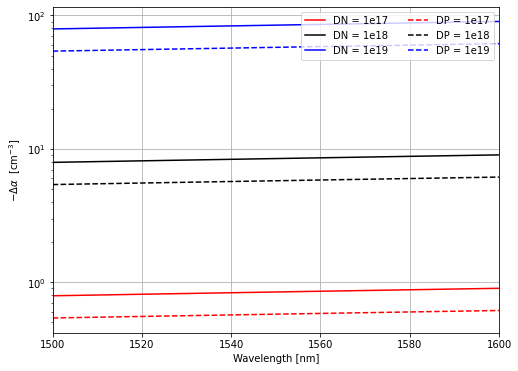

In [11]:
plt.figure(figsize=(8,6))
plt.plot(1e9*lmbd, Dalpha_lambda(1e17, 0, lmbd), 'r', label = 'DN = 1e17')
plt.plot(1e9*lmbd, Dalpha_lambda(1e18, 0, lmbd), 'k', label = 'DN = 1e18')
plt.plot(1e9*lmbd, Dalpha_lambda(1e19, 0, lmbd), 'b', label = 'DN = 1e19')
plt.plot(1e9*lmbd, Dalpha_lambda(0, 1e17, lmbd), 'r--', label = 'DP = 1e17')
plt.plot(1e9*lmbd, Dalpha_lambda(0, 1e18, lmbd), 'k--', label = 'DP = 1e18')
plt.plot(1e9*lmbd, Dalpha_lambda(0, 1e19, lmbd), 'b--', label = 'DP = 1e19')
plt.yscale('log')
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'$-\Delta \alpha$  [cm$^{-3}$]')
plt.xlim([1500,1600])
plt.legend(ncol=2)

## pn-Junction phase shifter

### Carrier distribution

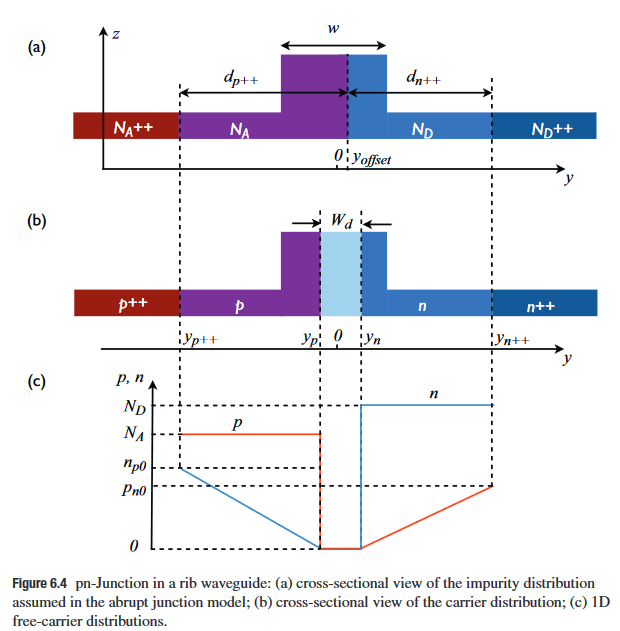

The width of the depletion region, $W_d$, is determined by the impurity densities ($N_A$ - acceptros - and $N_D$ - donors), as well as the applied voltage (V), and is given by:
\begin{equation}
W_d = \sqrt{\frac{2 ϵ_0 ϵ_s\left( N_A + N_D \right) \left( V_{bi} - V \right)}{q N_A N_D}}
\end{equation}
where:
* $ϵ_s$ - relative permittivity ($11.9$ - Silicon);
* $ϵ_0$ - free-space permittivity;
* $q$ - electron charge;
* $V_{bi}$ - built-in or diffusion potential of the junction given by:
\begin{equation}
V_{bi} = \frac{k_B T}{q} \ln \left( \frac{N_A N_D}{n_i^2}\right)
\end{equation}
* $k_B$ - Bolztmann constant;
* $T$ - room temperature;
* $n_i$ - intrinsic carrier concentration $\left(1.5 \times 10^{10} \textrm{cm}^{-3}\right)$.

In [12]:
def depletion_region(NA, ND, ni, T, V):
  Vbi = VbiC(T, NA, ND, ni)
  return np.sqrt(2*epsilon_s*epsilon_0*(NA+ND)*(Vbi-V)/(q*NA*ND))

def VbiC(T, NA, ND, ni):
  return (kB*T/q)*np.log(NA*ND/ni**2)

In [13]:
# Constants
T = 25           # Temperature - Celsius
epsilon_s = 11.9 # relative dieletrctic constant for Si
kB = Boltzmann   # Boltzmann constant in J/K
T = 273.15 + T   # Temperature - Kelvin
q = e            # electronic charge [Coulombs]

In [14]:
ni = 1e6*1.5e10
P  = 1e6*1e17 # Acceptors
N  = 1e6*1e17 # Donors
npM = np.logspace(0,1,10) # carrier density variation
V = 0

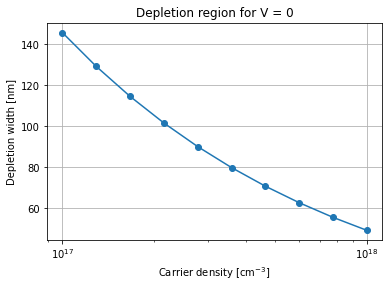

In [15]:
plt.plot(1e-6*npM*P, 1e9*depletion_region(npM*P, npM*N, ni, T, V), 'o-')
plt.xlabel('Carrier density [cm$^{-3}$]')
plt.ylabel('Depletion width [nm]')
plt.xscale('log')
plt.title('Depletion region for V = 0')
plt.grid()

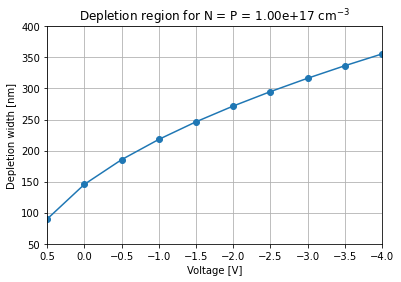

In [16]:
V = np.linspace(-4,0.5,10)
plt.plot(V, 1e9*depletion_region(P, N, ni, T, V), 'o-')
plt.xlabel('Voltage [V]')
plt.ylabel('Depletion width [nm]')
plt.title('Depletion region for N = P = %3.2e cm$^{-3}$' %(1e-6*P))
plt.xlim([V.max(), V.min()])
plt.ylim([50,400])
plt.grid()

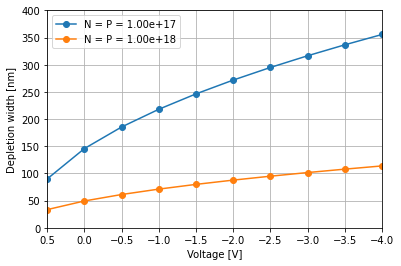

In [17]:
plt.plot(V, 1e9*depletion_region(P, N, ni, T, V), 'o-', label = 'N = P = %3.2e' %(1e-6*P))
plt.plot(V, 1e9*depletion_region(10*P, 10*N, ni, T, V), 'o-', label = 'N = P = %3.2e' %(1e-5*P))
plt.xlabel('Voltage [V]')
plt.ylabel('Depletion width [nm]')
plt.xlim([V.max(), V.min()])
plt.ylim([0,400])
plt.grid()
plt.legend()

The boundaries of the depletion region are given by:
\begin{align}
  y_p &= y_{offset} - \frac{W_d}{1+\frac{N_A}{N_D}} \\
  y_n &= y_{offset} + \frac{W_d}{1+\frac{N_D}{N_A}}
\end{align}

The carrier densities, $\Delta N = n\left( y, V\right)$, and $\Delta P = p\left( y, V\right)$, are given by
\begin{align}
  n\left( y, V\right) = \begin{cases}
  n_{p0}\left[ 1 + \left( 1 - \frac{y_p - y}{y_p - y_{p++}} \right) \exp{\left( \frac{qV}{k_B T} - 1\right)} \right], \, &\text{ for } y_{p++} < y < y_p \\
  0, \, &\text{ for } y_{p} < y < y_n \\
  N_D, \, &\text{ for } y_{n++} > y > y_n \\
   \end{cases}
\end{align}
and
\begin{align}
  p\left( y, V\right) = \begin{cases}
  N_A, \, &\text{ for } y_{p++} < y < y_p \\
  0, \, &\text{ for } y_{p} < y < y_n \\
  p_{n0}\left[ 1 + \left( 1 - \frac{y - y_n}{y_{p++} - y_p} \right) \exp{\left( \frac{qV}{k_B T} - 1\right)} \right], \, &\text{ for } y_{n++} > y > y_n \\
   \end{cases}
\end{align}
where
\begin{align}
  n_{p0} &= \frac{n_i^2}{N_A}, \\
  p_{n0} &= \frac{n_i^2}{N_D}
\end{align}

In [ ]:
# Material constants
NA = 1e17*1e6 #cm^-3 -> m^-3
ND = 1e17*1e6 #cm^-3 -> m^-3
NA_plus = 1e19*1e6 #cm^-3 -> m^-3
ND_plus = 1e19*1e6 #cm^-3 -> m^-3
NA_plus_plus = 1e20*1e6 #cm^-3 -> m^-3
ND_plus_plus = 1e20*1e6 #cm^-3 -> m^-3

In [ ]:
Dn_1550_nm(0, 1e-6*NA_plus_plus)

-0.08804231041258488

In [ ]:
Dn_1550_nm(0, 1e-6*NA_plus)

-0.012784726178938076

In [ ]:
Dn_1550_nm(0, 1e-6*NA)

-0.00026958233510097885

In [ ]:
Dn_1550_nm(1e-6*ND,0)

-8.306035057636355e-05

In [ ]:
Dn_1550_nm(1e-6*ND_plus,0)

-0.008737632203272517

In [ ]:
Dn_1550_nm(1e-6*ND_plus_plus,0)

-0.08961769300162786

### Optical phase response

The effective index, $n_{eff}$, and the optical loss due to the free-carrier absorption, $\alpha_{pn}$, as functions of applied voltage are given by

\begin{align}
\begin{array}{l}
n_{\mathrm{eff}}(V) =&n_{\mathrm{eff}, i}+\frac{\displaystyle  \int E^*(y) \cdot \Delta n(y, V) E(y) \mathrm\, {d}y}{\displaystyle \int E^*(y) \cdot E(y) \, d y} \cdot \frac{\displaystyle \mathrm{d} n_{\mathrm{eff}}}{\displaystyle \mathrm{d} n_{c o}} \\
\alpha_{p n}(V) =& \frac{\displaystyle \int E^*(y) \cdot \Delta \alpha(y, V) E(y) \, \mathrm{d}y}{\displaystyle \int E^*(y) \cdot E(y) \, \mathrm{d}y},
\end{array}
\end{align}

where $n_{\mathrm{eff},i}$ is the effective index of the waveguide without any doping and $\mathrm{d} n_{\mathrm{eff}}/\mathrm{d} n_{c o}$ (change of mode effective index versus change in the waveguide core effective index) is typically very close to 1. $E\left( y\right)$ is the 1D field profile found using the effective index method.

The voltage-dependent changes in effective index and phase are given by:
\begin{align}
  \Delta n_{\mathrm{eff}}\left( V \right) =& \; n_{\mathrm{eff}}\left( V \right) - n_{\mathrm{eff}}\left( 0 \right) \\
  \Delta \phi \left( V \right)\left[\pi \cdot \mathrm{cm}^{-1}\right] =& \; \frac{0.02 \, \Delta n_{\mathrm{eff}}\left( V \right)}{\lambda}
\end{align}

In [ ]:
w = 500e-9
h = 220e-9
slab = 90e-9
y_offset = 50e-9

### Small signal response

The resistance and capacitance of the pn-junction are given by:

\begin{equation}
R_j[\Omega \cdot \mathrm{m}] = \left(\frac{w}{2}+y_p\right) R_{s r p}+\left(\frac{w}{2}-y_n\right) R_{s r n} -\left(\frac{w}{2}+y_{p++}\right) R_{s s p}+\left(y_{n++}-\frac{w}{2}\right) R_{s s n}
\end{equation}
and
\begin{equation}
C_j[\mathrm{~F} / \mathrm{m}] = t_{r i b} \sqrt{\frac{q \epsilon_0 \epsilon_s}{2\left(1 / N_D+1 / N_A\right)\left(V_{b i}-V\right)}}
\end{equation}
where $R_{srn}$, $R_{srp}$, $R_{ssn}$, and $R_{ssp}$ are the sheet resistances of the n-doped rib, p-doped rib, n-doped slab, and p-doped slab, respectively.

Then, the 3-dB cutoff frquency determined by the RC time constant can be found by:
\begin{equation}
f_c = \frac{1}{2\pi R_j C_j}
\end{equation}


## DEVSIM

In [ ]:
%%capture
from gdsfactory.simulation.devsim import get_simulation_xsection

nm = 1e-9

c = get_simulation_xsection.PINWaveguide(
    wg_width=500 * nm,
    wg_thickness=220 * nm,
    slab_thickness=90 * nm,
)

# Initialize mesh and solver
c.ddsolver()

ModuleNotFoundError: ignored

# References



1.   M. Nedeljkovic, R. Soref, and G. Z. Mashanovich. “Free-carrier electro-refraction
and electroabsorption modulation predictions for silicon over the 1–14 micron
infrared wavelength range”. IEEE Photonics Journal 3.6 (2011), pp. 1171–1180.
2.   Item da lista

